## Analysing output from sqlite pipeline

In [1]:
import requests
import json
from pprint import pprint
import pandas as pd
import sqlite3
import matplotlib.pyplot as plt
import seaborn as sns


## Load in data from local SQL db

In [2]:
conn = sqlite3.connect('data.db')

df = pd.read_sql_query('SELECT * FROM data', conn)

df.head()


,id,name,tagline,first_brewed,description,image_url,abv,ibu,target_fg,target_og,...,ph,attenuation_level,volume,boil_volume,brewers_tips,contributed_by,volume_unit,boil_volume_unit,brew_year,brew_month
0,1,Buzz,A Real Bitter Experience.,09/2007,"A light, crisp and bitter IPA brewed with Engl...",https://images.punkapi.com/v2/keg.png,4.5,60.0,1010,1044.0,...,4.4,75.0,20,25,The earthy and floral aromas from the hops can...,Sam Mason <samjbmason>,litres,litres,2007,9
1,2,Trashy Blonde,You Know You Shouldn't,04/2008,"A titillating, neurotic, peroxide punk of a Pa...",https://images.punkapi.com/v2/2.png,4.1,41.5,1010,1041.7,...,4.4,76.0,20,25,Be careful not to collect too much wort from t...,Sam Mason <samjbmason>,litres,litres,2008,4
2,3,Berliner Weisse With Yuzu - B-Sides,Japanese Citrus Berliner Weisse.,11/2015,Japanese citrus fruit intensifies the sour nat...,https://images.punkapi.com/v2/keg.png,4.2,8.0,1007,1040.0,...,3.2,83.0,20,25,Clean everything twice. All you want is the cl...,Sam Mason <samjbmason>,litres,litres,2015,11
3,4,Pilsen Lager,Unleash the Yeast Series.,09/2013,Our Unleash the Yeast series was an epic exper...,https://images.punkapi.com/v2/4.png,6.3,55.0,1012,1060.0,...,4.4,80.0,20,25,Play around with the fermentation temperature ...,Ali Skinner <AliSkinner>,litres,litres,2013,9
4,5,Avery Brown Dredge,Bloggers' Imperial Pilsner.,02/2011,An Imperial Pilsner in collaboration with beer...,https://images.punkapi.com/v2/5.png,7.2,59.0,1027,1069.0,...,4.4,67.0,20,25,Make sure you have a big enough yeast starter ...,Sam Mason <samjbmason>,litres,litres,2011,2


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 25 entries, 0 to 24
Data columns (total 22 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 25 non-null     int64  
 1   name               25 non-null     object 
 2   tagline            25 non-null     object 
 3   first_brewed       25 non-null     object 
 4   description        25 non-null     object 
 5   image_url          25 non-null     object 
 6   abv                25 non-null     float64
 7   ibu                24 non-null     float64
 8   target_fg          25 non-null     int64  
 9   target_og          25 non-null     float64
 10  ebc                23 non-null     float64
 11  srm                23 non-null     float64
 12  ph                 24 non-null     float64
 13  attenuation_level  25 non-null     float64
 14  volume             25 non-null     int64  
 15  boil_volume        25 non-null     int64  
 16  brewers_tips       25 non-nu

## Manipulating and aggregating the data and visualizing it 

brew_year
2007    2
2008    3
2009    1
2010    2
2011    5
2012    3
2013    6
2014    1
2015    2
Name: name, dtype: int64


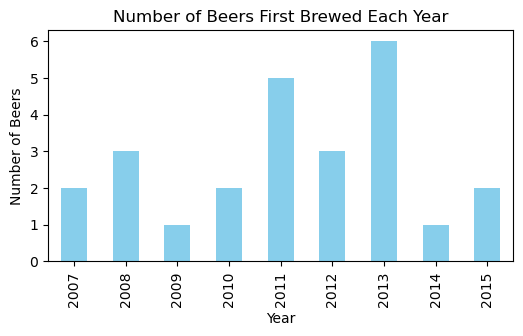

In [4]:
# Explore the distribution of beers based on the year they were first brewed.
 
beers_by_year = df.groupby('brew_year')['name'].count()

print(beers_by_year)

plt.figure(figsize=(6, 3))
beers_by_year.plot(kind='bar', color='skyblue')
plt.title('Number of Beers First Brewed Each Year')
plt.xlabel('Year')
plt.ylabel('Number of Beers')

plt.show()


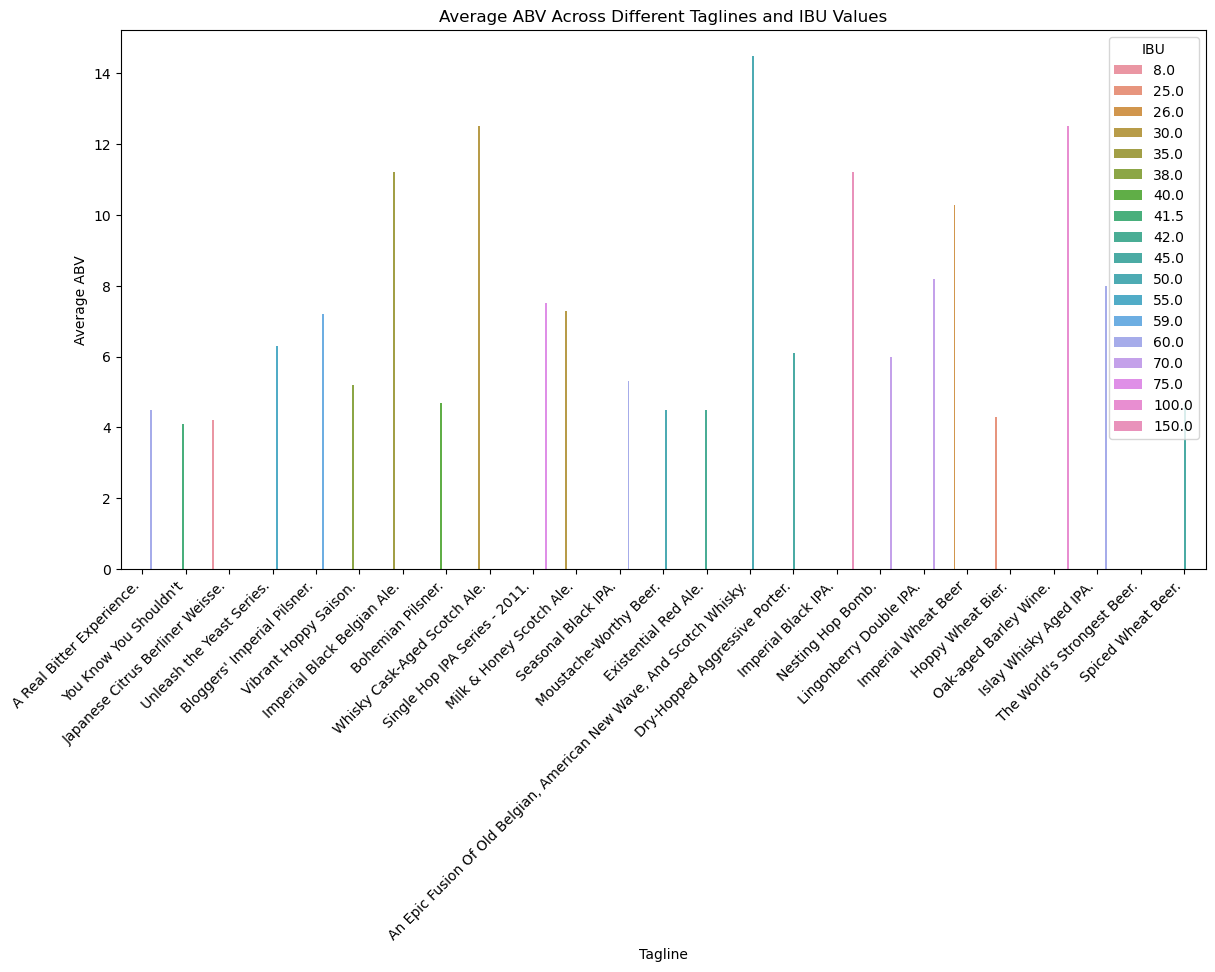

In [5]:
# How does the Average Alcohol By Volume (ABV) Vary Across Different Taglines, Considering the Bitterness Levels (IBU) of Beers?


abv_pivot = df.pivot_table(values='abv', index='tagline', columns='ibu', aggfunc='mean')


plt.figure(figsize=(14, 7))
sns.barplot(x='tagline', y='abv', hue='ibu', data=df)
plt.title('Average ABV Across Different Taglines and IBU Values')
plt.xlabel('Tagline')
plt.ylabel('Average ABV')
plt.xticks(rotation=45, ha='right')
plt.legend(title='IBU', loc='upper right')

plt.show()


    brew_year  brew_month  beer_count
0        2007           9           1
1        2007          12           1
2        2008           4           1
3        2008          10           1
4        2008          12           1
5        2009          11           1
6        2010           2           1
7        2010           3           1
8        2011           1           1
9        2011           2           1
10       2011           3           1
11       2011           4           1
12       2011           6           1
13       2012           1           2
14       2012           7           1
15       2013           3           1
16       2013           4           2
17       2013           5           1
18       2013           6           1
19       2013           9           1
20       2014           8           1
21       2015          11           1
22       2015          12           1


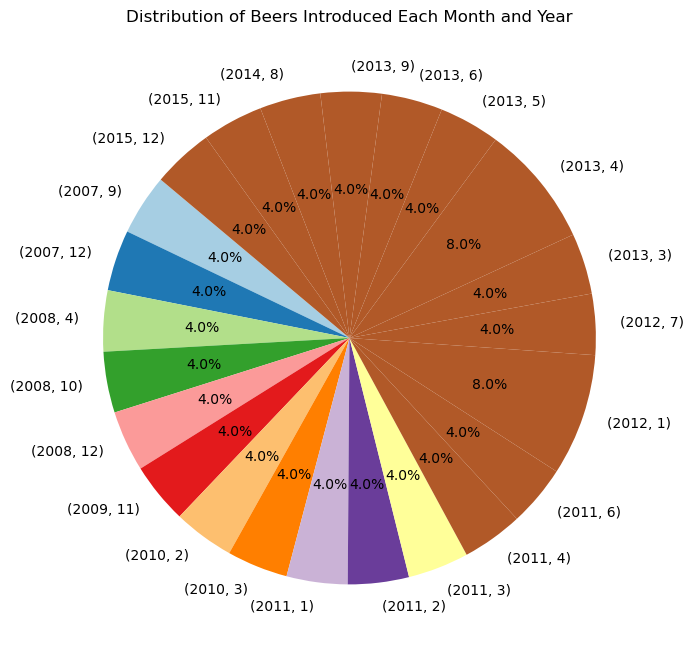

In [6]:
# How does the number of beers introduced each month vary over the years?

monthly_counts = df.groupby(['brew_year','brew_month']).size().reset_index(name='beer_count')

print(monthly_counts)


plt.figure(figsize=(10, 8))
colors = plt.cm.Paired(range(len(monthly_counts)))

total_beers_per_month = monthly_counts.groupby(['brew_year', 'brew_month'])['beer_count'].sum()

plt.pie(total_beers_per_month, labels=total_beers_per_month.index, autopct='%1.1f%%', colors=colors, startangle=140)
plt.title('Distribution of Beers Introduced Each Month and Year')

plt.show()

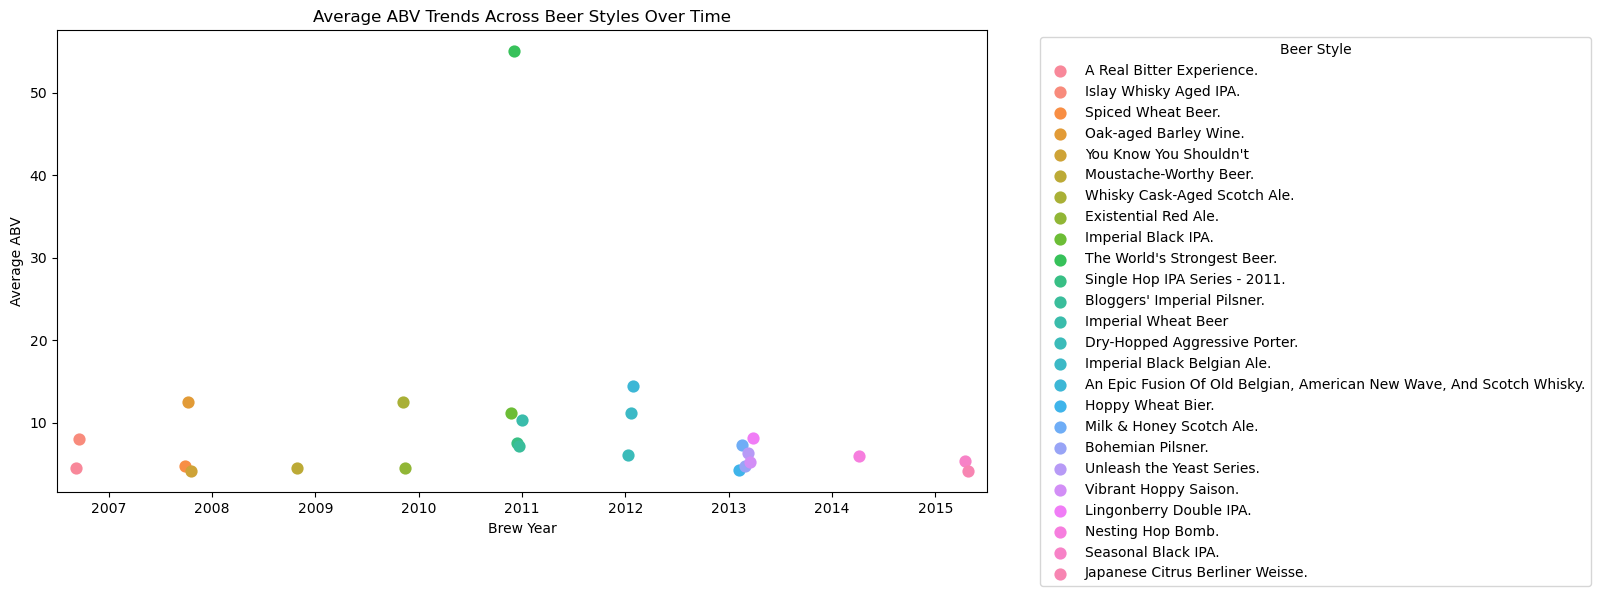

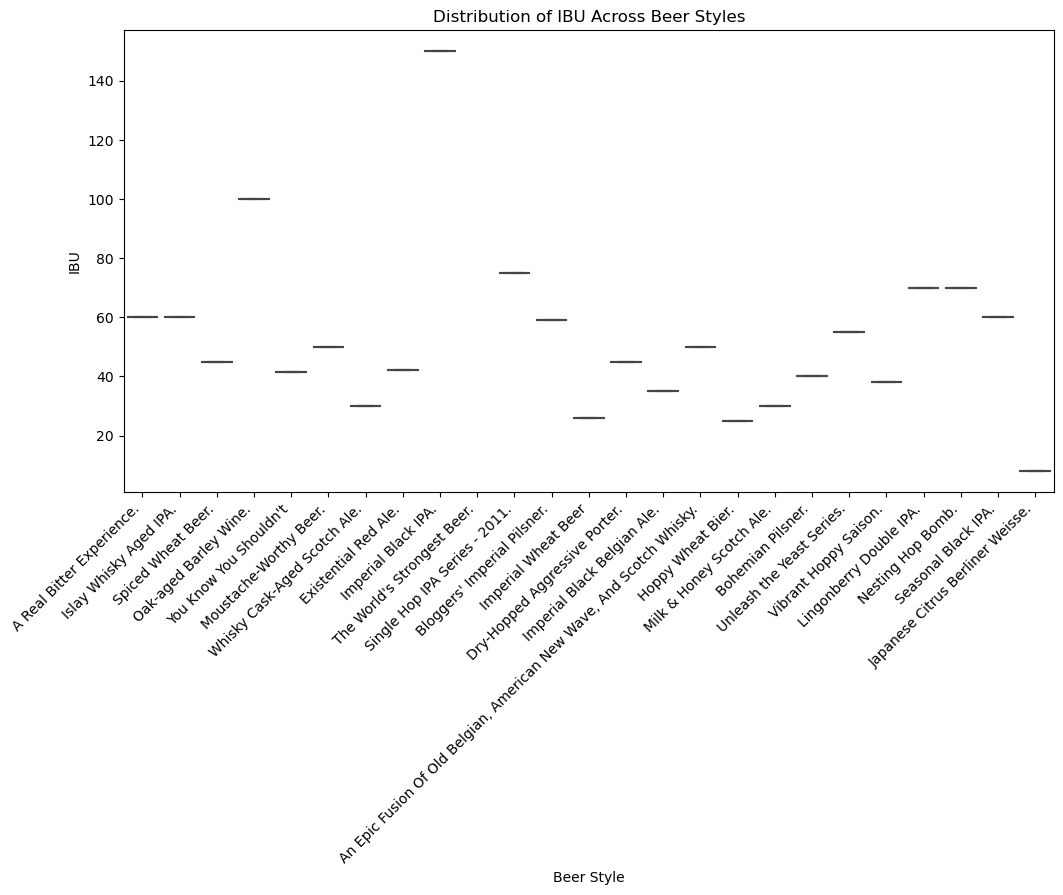

In [7]:
# Investigate the variation in Alcohol By Volume (ABV) and International Bitterness Units (IBU) among different beer styles over time.


beer_stats = df.groupby(['tagline', 'brew_year']).agg({'abv': 'mean', 'ibu': 'mean'}).reset_index()

beer_stats = beer_stats.sort_values(by='brew_year')


plt.figure(figsize=(12, 6))
sns.pointplot(x='brew_year', y='abv', hue='tagline', data=beer_stats, dodge=True, markers='o', linestyles='-')
plt.title('Average ABV Trends Across Beer Styles Over Time')
plt.xlabel('Brew Year')
plt.ylabel('Average ABV')
plt.legend(title='Beer Style', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()


plt.figure(figsize=(12, 6))
sns.boxplot(x='tagline', y='ibu', data=beer_stats)
plt.title('Distribution of IBU Across Beer Styles')
plt.xlabel('Beer Style')
plt.ylabel('IBU')
plt.xticks(rotation=45, ha='right')

plt.show()

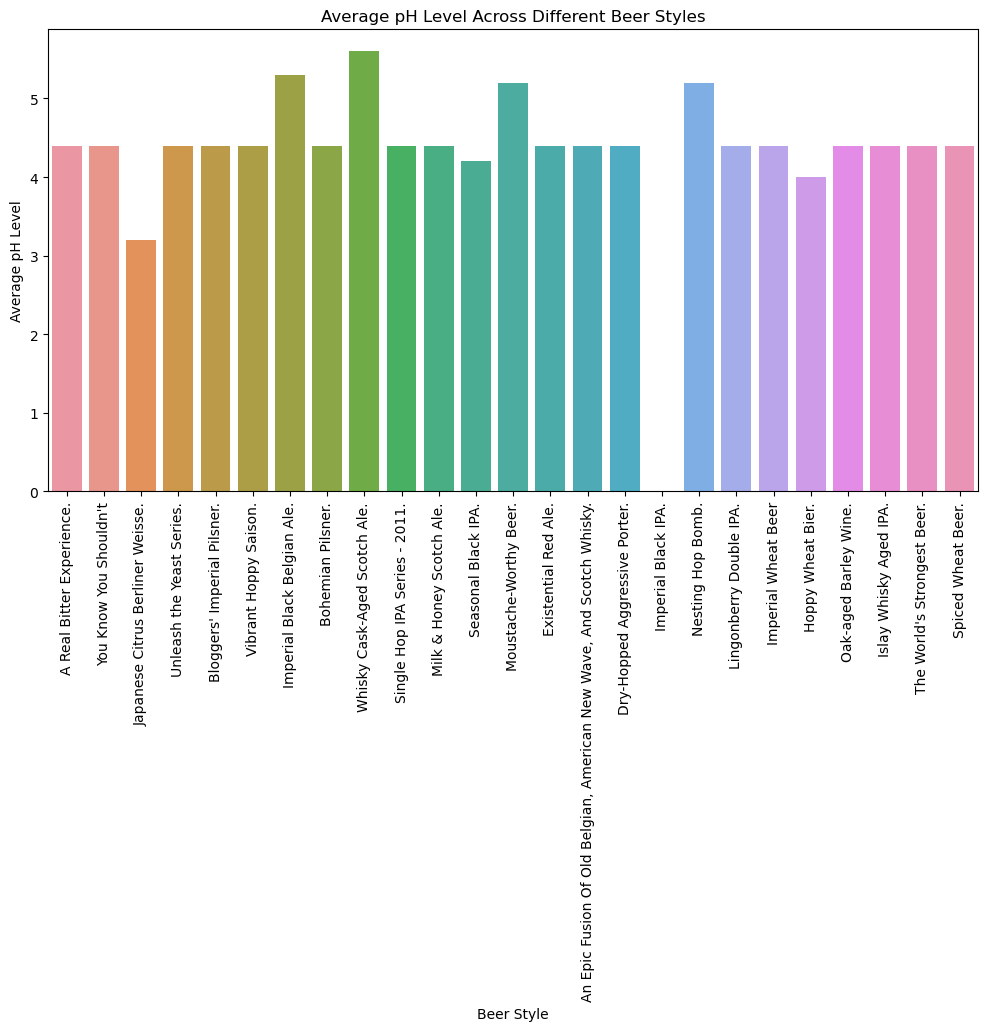

In [10]:
# Analyzing the average pH level across different beer styles.

ph_beer_style_analysis = df.groupby('tagline')['ph'].mean()

plt.figure(figsize=(12, 6))
sns.barplot(x='tagline', y='ph', data=df)
plt.title('Average pH Level Across Different Beer Styles')
plt.xlabel('Beer Style')
plt.ylabel('Average pH Level')
plt.xticks(rotation=90)

plt.show()

          ebc       srm
ebc  1.000000  0.998674
srm  0.998674  1.000000


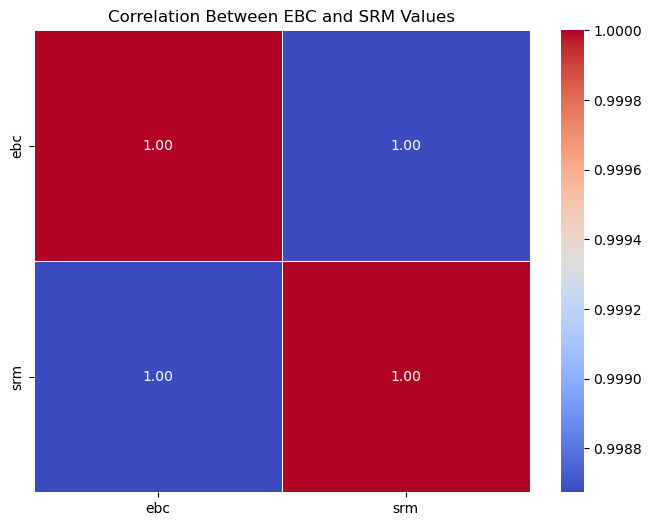

In [9]:
# Analyzing the correlation between EBC (European Brewery Convention color scale) and SRM (Standard Reference Method color scale) values.

ebc_srm_correlation = df[['ebc', 'srm']].corr()
print(ebc_srm_correlation)


plt.figure(figsize=(8, 6))
sns.heatmap(ebc_srm_correlation, annot=True, cmap='coolwarm', fmt=".2f", linewidths=.5)
plt.title('Correlation Between EBC and SRM Values')

plt.show()